## EDA for King County Housing

### The client is Larry Sanders.

- Waterfront
- Limited budget
- Nice & Isolated 
- But central neighborhood 
- Without kids (but got some of his own, just doesn't want his kids to play with other kids .. because of germs)

## Questions

1. Are there Waterfront Properties that fit a limited budget?
    - Does a limited budget exclude outliers and whiskers?
2. What influences the price most? View or Waterfront?
    - If the waterfront house is closer to the city center, is the price higher
3. Are there isolated properties in central neighborhoods?
    - Is a smaller waterfront house with big lot size cheaper than a big waterfront house with smaller lot?
4. If your neighbours had big properties would you consider the area closer to the city and not so isolated?
5. What are the best areas to buy in the city with the biggest lot sizes?

### Some Information

Your client wants to get a good understanding of the general housing condition in Seattle and surroundings and furthermore to have some recommendations tailored to their needs.


In [63]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import plotly.express as px
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import PercentFormatter

plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [46]:
df = pd.read_csv('./data/eda.csv')

#converting to proper datetime format
df.date = pd.to_datetime(df.date)
df = df.rename({'id.1': 'sale_id'}, axis=1)
df.columns


Index(['id', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15', 'date', 'price', 'house_id', 'sale_id'],
      dtype='object')

In [137]:
df.shape

(21597, 23)

In [139]:
df.head()

,id,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,price,house_id,sale_id
0,7129300520,3.000,1.000,1180.000,5650.000,1.000,NaN,0.000,3,7,...,0.000,98178,47.511,-122.257,1340.000,5650.000,2014-10-13,221900.000,7129300520,1
1,6414100192,3.000,2.250,2570.000,7242.000,2.000,0.000,0.000,3,7,...,19910.000,98125,47.721,-122.319,1690.000,7639.000,2014-12-09,538000.000,6414100192,2
2,5631500400,2.000,1.000,770.000,10000.000,1.000,0.000,0.000,3,6,...,NaN,98028,47.738,-122.233,2720.000,8062.000,2015-02-25,180000.000,5631500400,3
3,2487200875,4.000,3.000,1960.000,5000.000,1.000,0.000,0.000,5,7,...,0.000,98136,47.521,-122.393,1360.000,5000.000,2014-12-09,604000.000,2487200875,4
4,1954400510,3.000,2.000,1680.000,8080.000,1.000,0.000,0.000,3,8,...,0.000,98074,47.617,-122.045,1800.000,7503.000,2015-02-18,510000.000,1954400510,5


<Axes: >

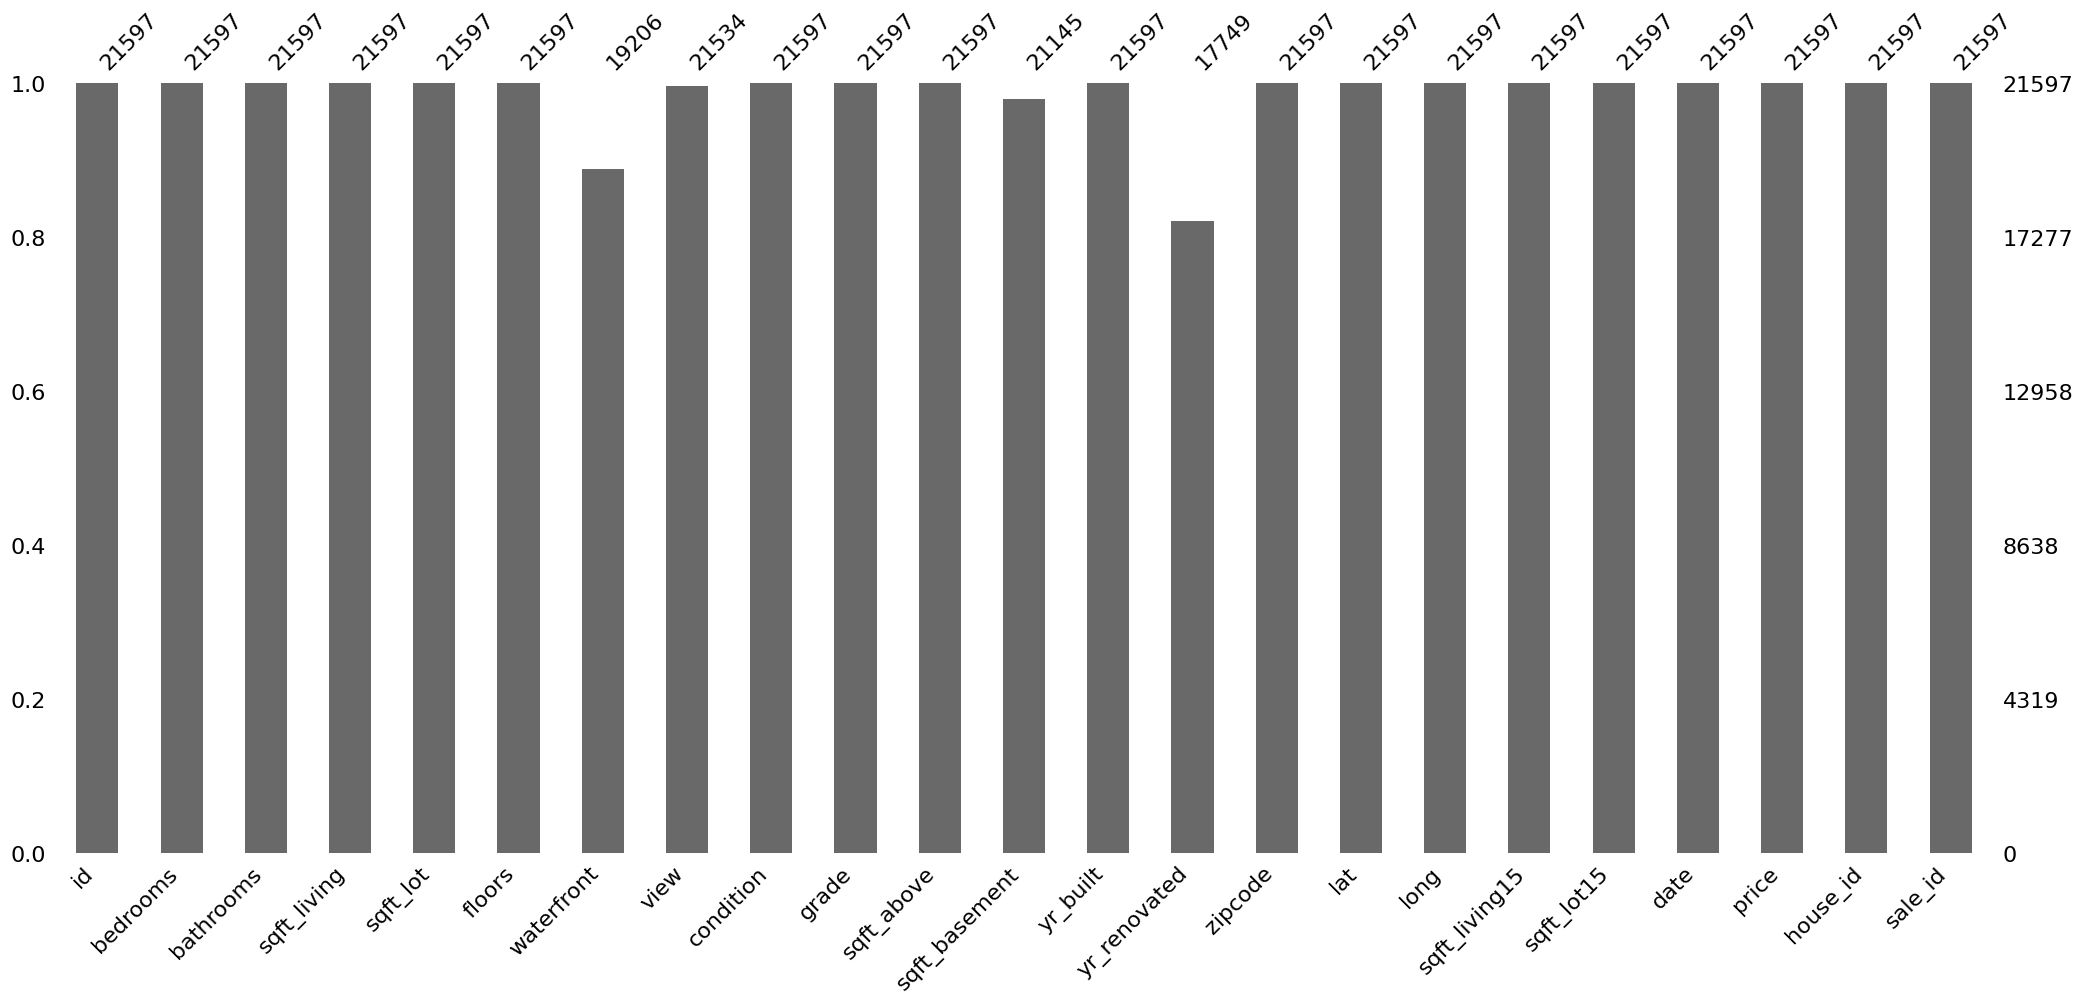

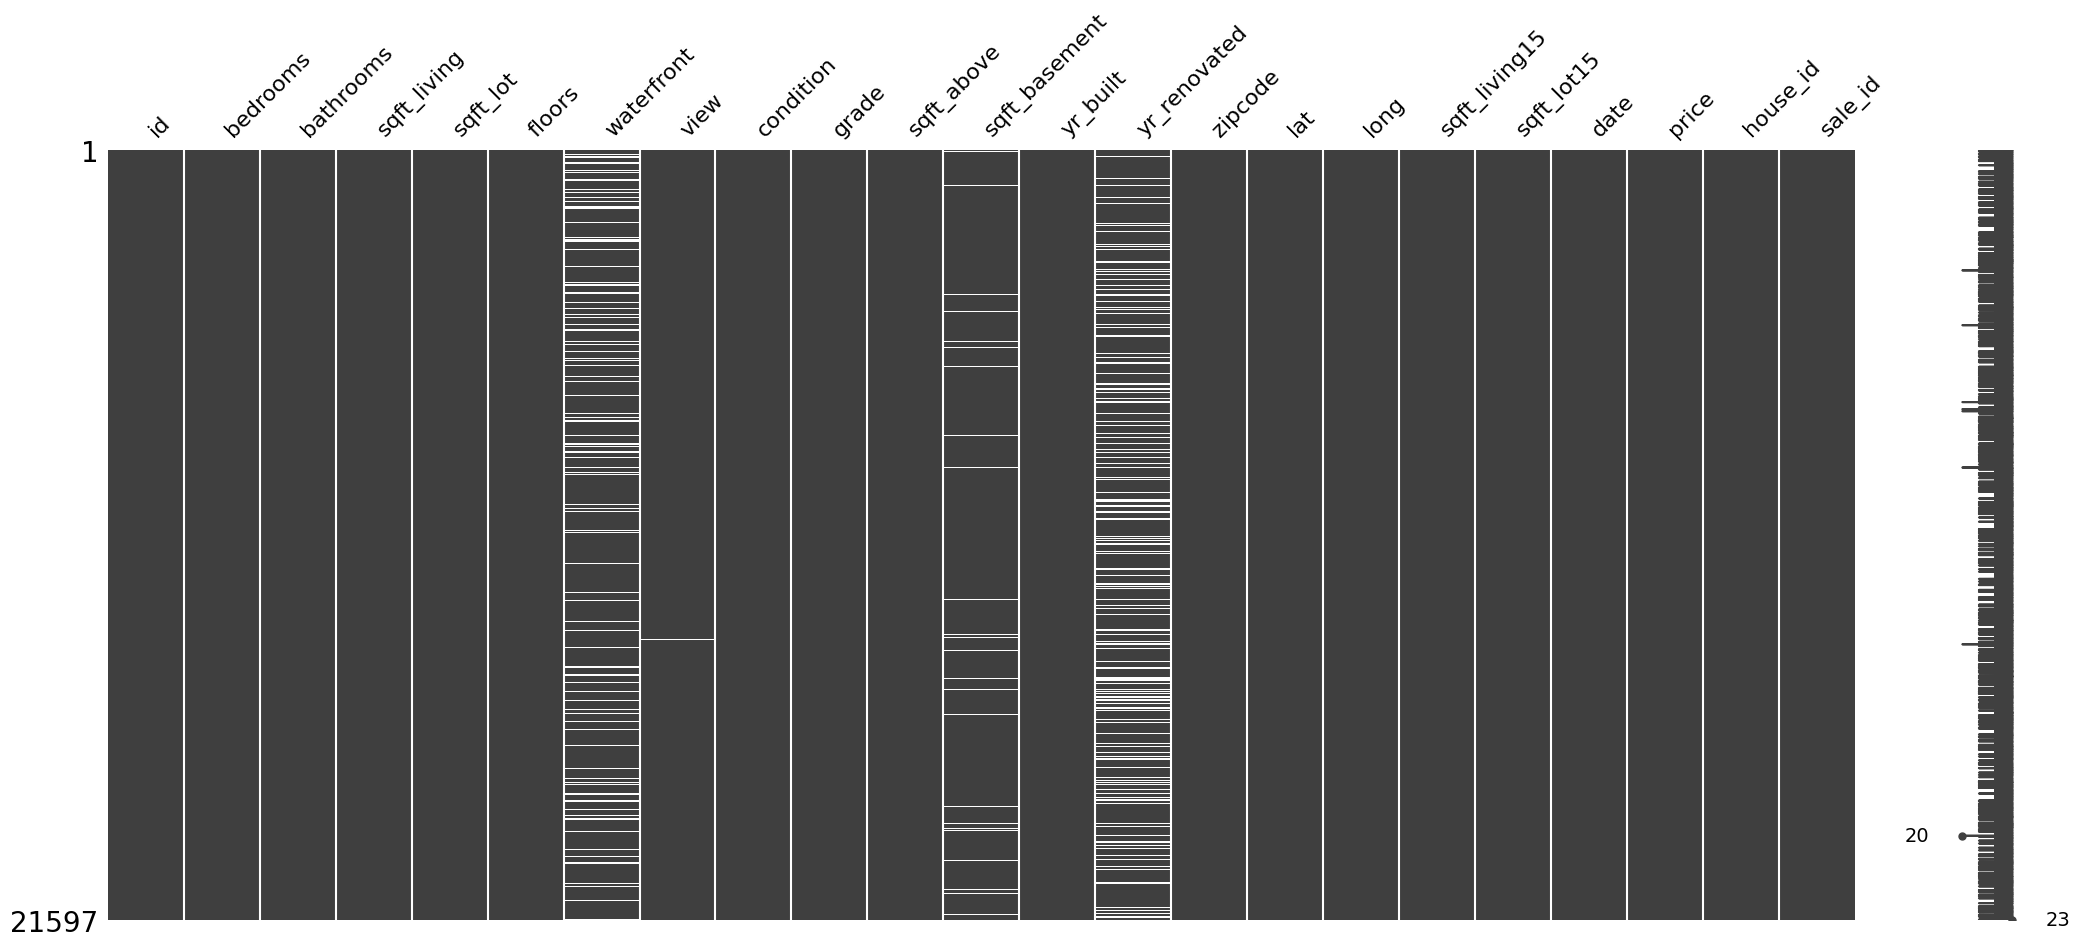

In [89]:
# fig, ax = plt.subplots()
# plt.show()
msno.bar(df)
msno.matrix(df)

In [55]:
# examining whether there are unrelated values
df.waterfront.unique()

array([nan,  0.,  1.])

In [49]:
df.duplicated().value_counts()
# we don't have any duplicates

False    21597
Name: count, dtype: int64

In [196]:
df.view.max()

df_geopos = df[['lat', 'long', 'price', 'waterfront']].copy()

df_waterfront = df_geopos[df_geopos['waterfront'] > 0]
df_waterfront_unknown= df_geopos[df_geopos['waterfront'].isna()]

df_waterfront_unknown

,lat,long,price,waterfront
0,47.511,-122.257,221900.000,NaN
10,47.601,-122.145,662500.000,NaN
23,47.353,-122.166,252700.000,NaN
40,47.614,-122.027,625000.000,NaN
55,47.660,-122.290,885000.000,NaN
...,...,...,...,...
21578,47.375,-122.107,350000.000,NaN
21582,47.293,-122.264,541800.000,NaN
21586,47.309,-122.002,224000.000,NaN
21587,47.539,-121.881,507250.000,NaN


In [197]:

lats = df_waterfront_unknown.lat
lons = df_waterfront_unknown.long

title = "Properties in Seattle"

fig = px.scatter_mapbox(df_waterfront_unknown, 
                        lat=lats, 
                        lon=lons,
                        hover_data=["price"], 
                        size='price',
                        color_continuous_scale=px.colors.carto.Agsunset_r, 
                        zoom=9.5
                        )

lats = df_geopos.lat
lons = df_geopos.long

title = "Properties in Seattle"
# fig = px.scatter_mapbox(df_waterfront, 
#                         lat=lats, 
#                         lon=lons,
#                         hover_data=["price"], 
#                         size='price',
#                         color_continuous_scale=px.colors.carto.Agsunset_r, 
#                         zoom=9.5
#                         )

fig.update_geos(fitbounds="locations")
fig.update_layout(height=1000)
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":25,"t":25,"l":25,"b":25})

fig.show()